# Classification sur le Titanic

## Dataset

- Source: Issu de la compétition Kaggle [Titanic](https://www.kaggle.com/c/titanic)
- Les données sont disponibles ici [data](https://www.kaggle.com/c/titanic/data)
- Pour faire fonctionner le notebook, placer les données "train.csv" dans le répertoire data/titanic, data étant au même niveau que le répertoire notebook contenant le présent notebook.
- [data dictionary](https://www.kaggle.com/c/titanic/data)
- But : Prédire qui va survivre

<img src="images/titanic.jpeg">

In [1]:
import numpy as np

In [2]:
import pandas as pd
datafile = './data/titanic/train.csv'
titanic = pd.read_csv(datafile, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 11)

- survival : a survécu (0 = Non; 1 = Oui)
- pclass : classe du passager
- sibsp : nombre de frères / soeurs ou époux à bord
- parch : nombre de parents / enfants à bord
- ticket : numéro de ticket
- fare : prix
- cabin : numéro de cabine
- embarked : Port d'embarquement (C = Cherbourg; Q = Queenstown; S = Southampton)

## Création de X et y

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


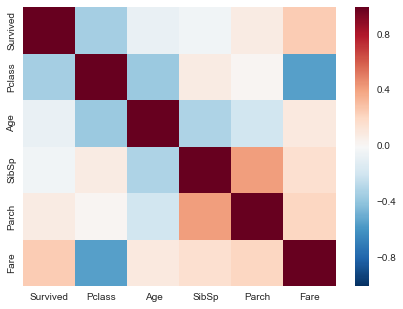

In [14]:
# visualisation sur une carte de chaleur
plt.figure(figsize=(7,5))
sns.heatmap(titanic.corr());

In [15]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

## Préparation des sets d'entraînement et de test

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Entraînement d'une régression logistique

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

## Prédictions et calcul de la précision

In [29]:
# prédictions de la classe
y_pred_class = logreg.predict(X_test)

In [30]:
y_pred_class

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [31]:
# calcul de la précision
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


## Comparaison avec un modèle simpliste

In [32]:
y_train.value_counts()

0    421
1    247
Name: Survived, dtype: int64

Modèle simpliste : on prédit toujours la classe majoritaire

In [33]:
y_pred_simpliste = np.zeros(len(y_test))

In [34]:
print(metrics.accuracy_score(y_test, y_pred_simpliste))

0.57399103139


# Matrice de confusion

In [35]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


Calcul des différentes valeurs (vrais / faux positifs / négatifs)

In [36]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [37]:
print('Vrais Positifs :', TP)
print('Vrais Négatifs :', TN)
print('Faux Positifs :', FP)
print('Faux Négatifs :', FN)

Vrais Positifs : 44
Vrais Négatifs : 105
Faux Positifs : 23
Faux Négatifs : 51


### La sensibilité

Aussi appelée rappel ou taux de vrais positifs

In [41]:
print (TP / float(TP + FN))

0.463157894737


### Taux de faux positifs

Ce sont les fausses alarmes.

In [42]:
print (FP / float(FP + TN))

0.1796875


### Taux de faux négatifs

Les positifs ratés par le modèle.

In [43]:
print (FN / float(TP + FN))

0.536842105263


### La spécificité

C'est le taux de vrais négatifs

In [44]:
print (TN / float(TN + FP))

0.8203125


# Prédire des probabilités d'appartenance à une classe

Calcul des probabilités de survie

In [47]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [48]:
y_pred_prob[:10]

array([ 0.5956251 ,  0.21391067,  0.38766891,  0.21391067,  0.55610323,
        0.21391067,  0.55610323,  0.5956251 ,  0.5956251 ,  0.21391067])

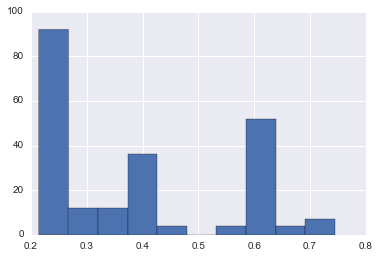

In [49]:
plt.hist(y_pred_prob);

In [50]:
(y_pred_prob > 0.5).astype(int)[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [51]:
y_pred_class[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

### Histogramme des probabilités prédites

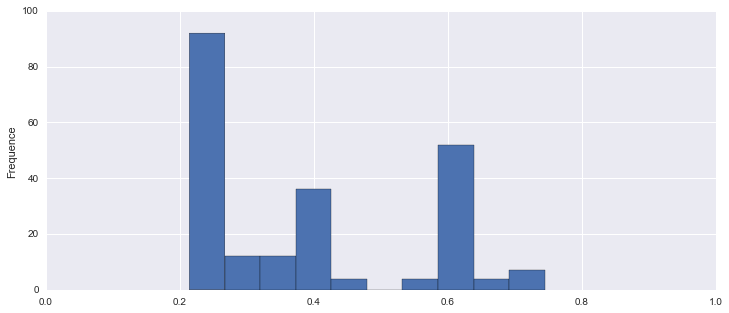

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.ylabel('Frequence');

In [53]:
y_test.shape

(223,)

## Augmenter la sensibilité en abaissant le seuil de prédiction

In [55]:
y_pred_class.sum()

67

In [56]:
y_pred_class = np.where(y_pred_prob > 0.5, 1, 0)
y_pred_class.sum()

67

In [57]:
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)
y_pred_class.sum()

119

L'ancienne matrice de confusion

In [58]:
print( confusion)

[[105  23]
 [ 51  44]]


Nouvelle matrice de confusion

In [59]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[72 56]
 [32 63]]


In [60]:
# sensibilité plus basse
print (TP / float(TP + FN))
print (63 / float(63 + 32))

0.463157894737
0.6631578947368421


In [61]:
# spécificité plus haute
print( TN / float(TN + FP))
print (72 / float(72 + 56))

0.8203125
0.5625


## Calcul de la courbe de ROC

In [63]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

0.66007401315789471

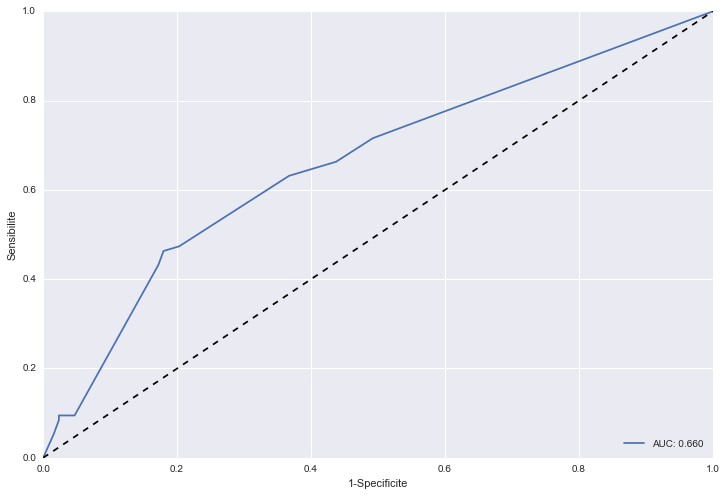

In [71]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='AUC: %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificite')
plt.ylabel('Sensibilite')
plt.grid(True)
plt.legend(loc="lower right")
roc_auc

## Un peu de feature engineering

In [46]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Remplacer "Sex" par une valeur booléenne

In [72]:
sexe = pd.get_dummies(titanic['Sex'], prefix='Sex')

In [73]:
sexe.sample(n=5)

,Sex_female,Sex_male
PassengerId,,
35,0.0,1.0
337,0.0,1.0
722,0.0,1.0
836,1.0,0.0
219,1.0,0.0


In [74]:
sexe.drop(['Sex_female'], axis=1, inplace=True)
titanic.drop(['Sex'], axis=1, inplace=True)

In [75]:
titanic = pd.concat([titanic, sexe], axis=1)

In [76]:
titanic.sample(n=5)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
PassengerId,,,,,,,,,,,
735,0,2,"Troupiansky, Mr. Moses Aaron",23.0,0,0,233639,13.0000,NaN,S,1.0
226,0,3,"Berglund, Mr. Karl Ivar Sven",22.0,0,0,PP 4348,9.3500,NaN,S,1.0
193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",19.0,1,0,350046,7.8542,NaN,S,0.0
643,0,3,"Skoog, Miss. Margit Elizabeth",2.0,3,2,347088,27.9000,NaN,S,0.0
215,0,3,"Kiernan, Mr. Philip",NaN,1,0,367229,7.7500,NaN,Q,1.0


### Variable Embarked

In [77]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
embarked = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

In [79]:
embarked.sample(n=5)

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
140,1.0,0.0,0.0
207,0.0,0.0,1.0
488,1.0,0.0,0.0
116,0.0,0.0,1.0
220,0.0,0.0,1.0


In [83]:
titanic.drop(['Embarked'], axis=1, inplace=True)
titanic = pd.concat([titanic, embarked], axis=1)

### Variable ticket

In [84]:
len(titanic.Ticket.unique())

681

In [85]:
titanic.shape

(891, 13)

On crée un dictionnaire qui donne pour chaque ticket le nombre de personnes associées.

In [108]:
tickets_count = titanic['Ticket'].value_counts()
dictionnaire_tickets = dict(zip(tickets_count.index.values, tickets_count))

In [109]:
tickets_count[:10]

CA. 2343        7
1601            7
347082          7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
382652          5
349909          4
347077          4
Name: Ticket, dtype: int64

In [110]:
dictionnaire_tickets["CA. 2343"]

7

On crée une variable "Famille" qui donne le nombre de personnes qui étaient sur le même ticket que le passager.

In [111]:
titanic['Famille'] = titanic['Ticket'].apply(lambda elt: dictionnaire_tickets[elt])

In [112]:
titanic.drop(['Ticket'], axis=1, inplace=True)

In [113]:
titanic.head(3)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Famille
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,1.0,0.0,0.0,1.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,0.0,1.0,0.0,0.0,1
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,0.0,0.0,0.0,1.0,1


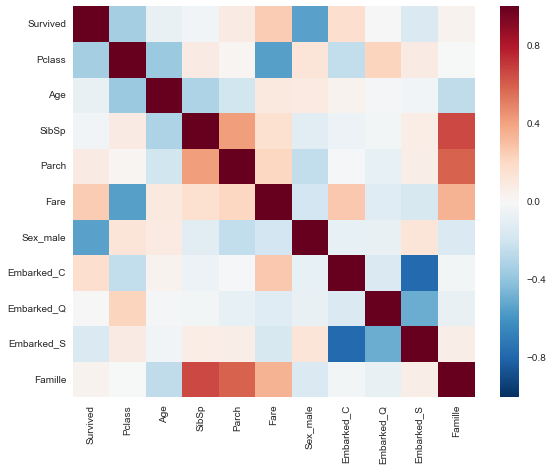

In [114]:
# visualisation sur une carte de chaleur
plt.figure(figsize=(9,7))
sns.heatmap(titanic.corr());

Cette variable est très corrélée aux variable "SibSp" et "Parch".

### Variable du nom

In [115]:
Name = titanic.Name.iloc[1]
print (Name)

Cumings, Mrs. John Bradley (Florence Briggs Thayer)


On compte le nombre de mots apparaissant dans le nom.

In [116]:
def nombre_de_mots(Name):
    return len(Name.split(' '))

In [117]:
nombre_de_mots(Name)

7

In [118]:
titanic['Length'] = titanic['Name'].apply(nombre_de_mots)

In [119]:
titanic.drop(['Name'], axis=1, inplace=True)

In [120]:
titanic.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Famille,Length
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,1.0,0.0,0.0,1.0,1,4
2,1,1,38.0,1,0,71.2833,C85,0.0,1.0,0.0,0.0,1,7
3,1,3,26.0,0,0,7.9250,NaN,0.0,0.0,0.0,1.0,1,3


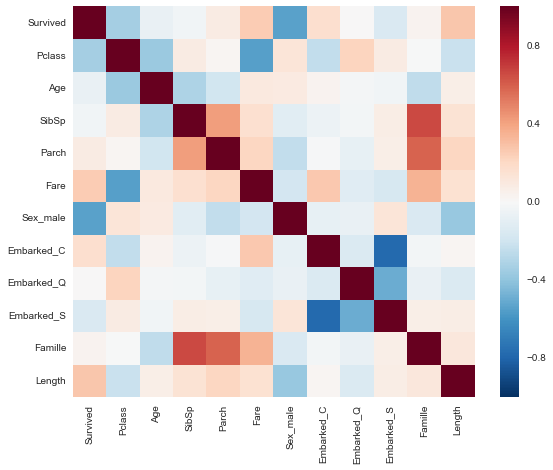

In [121]:
# visualisation sur une carte de chaleur
plt.figure(figsize=(9,7))
sns.heatmap(titanic.corr());

### Variable "Cabin"

On crée une variable booléenne qui dit si le passager avait une cabine ou non.

In [125]:
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [126]:
titanic['Cabin'][titanic['Cabin'].isnull()] = ' ';

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [127]:
titanic['Cabin'][titanic['Cabin'] == ''] = ' '

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
titanic.Cabin = titanic.Cabin.apply(lambda elt: elt[0])

In [131]:
titanic.Cabin.unique()

array([' ', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [132]:
dictionnary = {' ': 0, 'C': 3, 'E': 5, 'G': 7, 'D': 4, 'A': 1, 'B': 2, 'F': 6, 'T': 10}

In [133]:
titanic.Cabin = titanic.Cabin.apply(lambda elt: dictionnary[elt])

In [134]:
titanic['NobCabin'] = (titanic.Cabin == 0).astype(int)

In [135]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Famille,Length,NobCabin
PassengerId,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1.0,0.0,0.0,1.0,1,4,1
2,1,1,38.0,1,0,71.2833,3,0.0,1.0,0.0,0.0,1,7,0
3,1,3,26.0,0,0,7.9250,0,0.0,0.0,0.0,1.0,1,3,1
4,1,1,35.0,1,0,53.1000,3,0.0,0.0,0.0,1.0,2,7,0
5,0,3,35.0,0,0,8.0500,0,1.0,0.0,0.0,1.0,1,4,1


### Corrélation

In [136]:
correlations = titanic.corr()

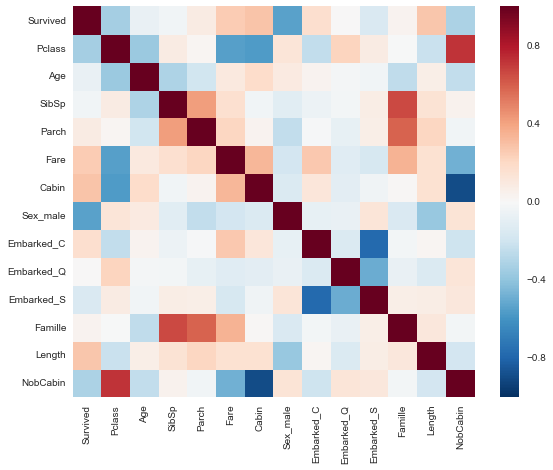

In [137]:
# visualisation sur une carte de chaleur
plt.figure(figsize=(9,7))
sns.heatmap(correlations);

### Vérification que les colonnes sont bien toutes numériques

In [138]:
for col in titanic.columns:
    if titanic[col].isnull().sum() != 0:
        print (col, titanic[col].isnull().sum())

Age 177


In [139]:
titanic[titanic['Age'].isnull()].sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Famille,Length,NobCabin
PassengerId,,,,,,,,,,,,,,
590,0,3,NaN,0,0,8.0500,0,1.0,0.0,0.0,1.0,1,3,1
215,0,3,NaN,1,0,7.7500,0,1.0,0.0,1.0,0.0,1,3,1
304,1,2,NaN,0,0,12.3500,5,0.0,0.0,1.0,0.0,1,4,0
512,0,3,NaN,0,0,8.0500,0,1.0,0.0,0.0,1.0,1,3,1
127,0,3,NaN,0,0,7.7500,0,1.0,0.0,1.0,0.0,1,3,1
793,0,3,NaN,8,2,69.5500,0,0.0,0.0,0.0,1.0,7,4,1
46,0,3,NaN,0,0,8.0500,0,1.0,0.0,0.0,1.0,1,4,1
230,0,3,NaN,3,1,25.4667,0,0.0,0.0,0.0,1.0,4,3,1
710,1,3,NaN,1,1,15.2458,0,1.0,1.0,0.0,0.0,2,6,1


Par quoi remplacer les valeurs absentes ?

Histogramme de la distribution de l'âge.

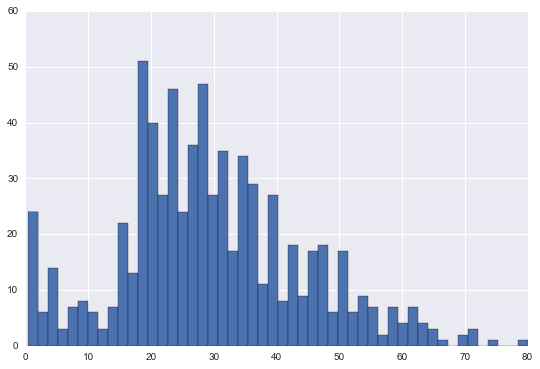

In [141]:
plt.figure(figsize=(9,6))
plt.hist(titanic['Age'][~titanic['Age'].isnull()], bins=50);

In [142]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [143]:
titanic['Age'][titanic['Age'].isnull()] = titanic['Age'].mean()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [146]:
titanic['Fare'] = titanic['Fare'] / titanic['Famille'].astype(float)

## Nouvelle régression logistique avec toutes les features

In [147]:
X = titanic.drop('Survived', axis=1)
y = titanic.Survived

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [149]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Interprétation des coefficients

In [151]:
list(zip(X_train.columns, logreg.coef_[0]))

[('Pclass', -0.81738150335714554),
 ('Age', -0.04083887614492452),
 ('SibSp', -0.40915334494343203),
 ('Parch', -0.017880984334969846),
 ('Fare', -0.00093334580454509778),
 ('Cabin', 0.34351262837849555),
 ('Sex_male', -2.2923533558057447),
 ('Embarked_C', 0.8176510672120888),
 ('Embarked_Q', 0.66190305266723004),
 ('Embarked_S', 0.15673529045757489),
 ('Famille', 0.03052779691751464),
 ('Length', 0.32414909457056651),
 ('NobCabin', 0.38112430395017038)]

In [152]:
# Prédiction
y_pred_class = logreg.predict(X_test)

In [153]:
# Précision
print (metrics.accuracy_score(y_test, y_pred_class))

0.80269058296


In [154]:
# Matrice de confusion
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [155]:
print ('Vrais Positifs :', TP)
print ('Vrais Négatifs :', TN)
print ('Faux Positifs :', FP)
print ('Faux Négatifs :', FN)

Vrais Positifs : 68
Vrais Négatifs : 111
Faux Positifs : 17
Faux Négatifs : 27


In [156]:
# Sensibilité
print( TP / float(TP + FN))
print( 44 / float(44 + 51))

0.715789473684
0.4631578947368421


In [157]:
# Spécificité
print( TN / float(TN + FP))
print( 105 / float(105 + 23))

0.8671875
0.8203125


### Histogramme des probabilités prédites

In [158]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

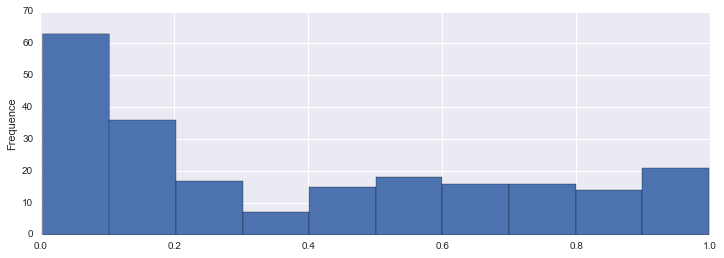

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.ylabel('Frequence');

### Une fonction pour plotter la courbe de ROC

In [160]:
def courbe_roc(y_test, y_pred_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='AUC: %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1-Specificite')
    plt.ylabel('Sensibilite')
    plt.grid(True)
    plt.legend(loc="lower right")
    print("Aire sous la courbe : ", roc_auc)

aire sous la courbe :  0.834662828947


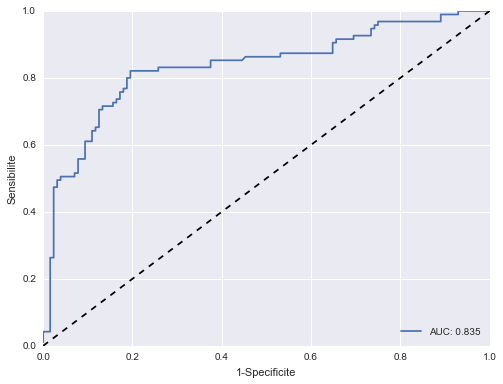

In [161]:
courbe_roc(y_test, y_pred_prob)

# Régularisation

In [162]:
logreg = LogisticRegression(C=0.1, penalty='l2')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Interprétation des coefficients

In [163]:
list(zip(X_train.columns, logreg.coef_[0]))

[('Pclass', -0.46264230426512976),
 ('Age', -0.032410045589569059),
 ('SibSp', -0.32855942103523239),
 ('Parch', 0.00094278480486877526),
 ('Fare', 0.0046040240628276398),
 ('Cabin', 0.30098538981828982),
 ('Sex_male', -1.554167886029165),
 ('Embarked_C', 0.32132367889014118),
 ('Embarked_Q', 0.22431626398932369),
 ('Embarked_S', -0.20725891516003431),
 ('Famille', 0.061246135068674414),
 ('Length', 0.41835306252403104),
 ('NobCabin', 0.14471663472733387)]

In [164]:
logreg?

In [165]:
# Prédiction
y_pred_class = logreg.predict(X_test)

In [166]:
# Précision
print(metrics.accuracy_score(y_test, y_pred_class))

0.766816143498


In [167]:
# Matrice de confusion
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [168]:
print( 'Vrais Positifs :', TP)
print ('Vrais Négatifs :', TN)
print( 'Faux Positifs :', FP)
print ('Faux Négatifs :', FN)

Vrais Positifs : 58
Vrais Négatifs : 113
Faux Positifs : 15
Faux Négatifs : 37


In [169]:
# Sensibilité
print( TP / float(TP + FN))
print (44 / float(44 + 51))

0.610526315789
0.4631578947368421


In [170]:
# Spécificité
print( TN / float(TN + FP))
print (105 / float(105 + 23))

0.8828125
0.8203125


aire sous la courbe :  0.831208881579


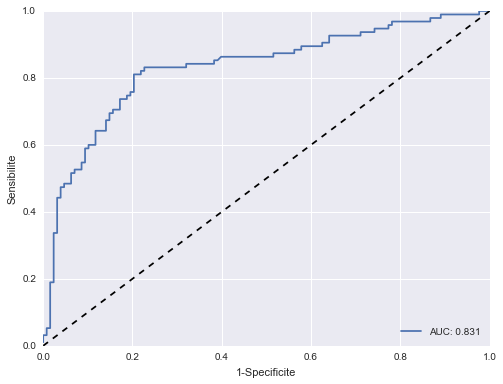

In [171]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
courbe_roc(y_test, y_pred_prob)

# La validation croisée

In [172]:
from sklearn.linear_model import SGDClassifier

In [173]:
logreg = SGDClassifier(warm_start=True, n_iter=1, loss='log')
logreg.fit(X_train, y_train);

In [174]:
print( logreg.score(X_train, y_train), logreg.score(X_test, y_test))

0.631736526946 0.569506726457


In [175]:
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

On utilise la log loss pour l'erreur

In [176]:
def erreur(true, pred):
    erreur = log_loss(true, pred)
    return erreur

In [177]:
from sklearn.metrics import log_loss

In [178]:
nombre_iterations = 100
taille_minibatch = 1
erreurs_train = []
erreurs_test = []
logreg = SGDClassifier(warm_start=True, n_iter=taille_minibatch, loss='log')
for i in range(nombre_iterations):
    logreg.fit(X_train, y_train)
    pred_train = logreg.predict_proba(X_train)[:,1]
    pred_test = logreg.predict_proba(X_test)[:,1]
    erreurs_train.append(erreur(y_train, pred_train))
    erreurs_test.append(erreur(y_test, pred_test))

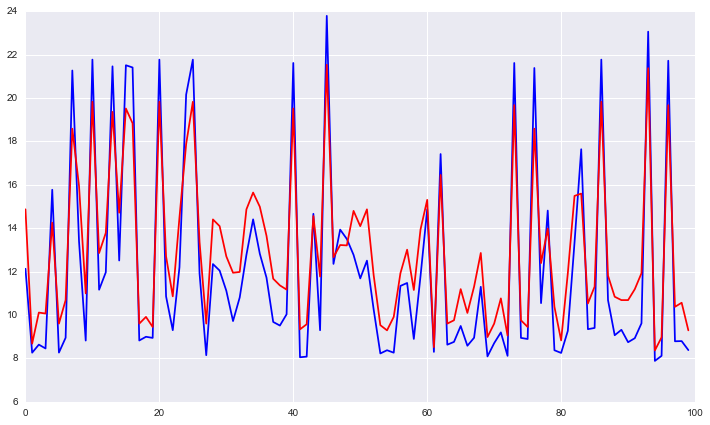

In [179]:
plt.figure(figsize=(12,7))
plt.plot(erreurs_train, color='blue')
plt.plot(erreurs_test, color='red')

## Avec un échantillon d'entraînement beaucoup plus petit

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.05)

In [181]:
X_train.shape[0]

44

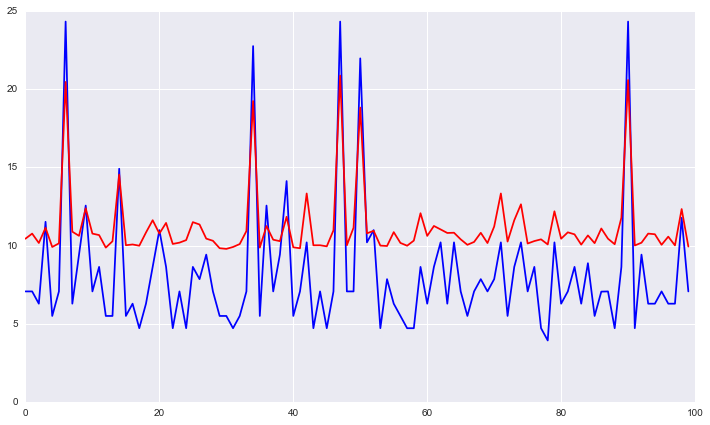

In [182]:
nombre_iterations = 100
taille_minibatch = 1
erreurs_train = []
erreurs_test = []
logreg = SGDClassifier(warm_start=True, n_iter=taille_minibatch, loss='log')
for _ in range(nombre_iterations):
    logreg.fit(X_train, y_train)
    pred_train = logreg.predict_proba(X_train)[:,1]
    pred_test = logreg.predict_proba(X_test)[:,1]
    erreurs_train.append(erreur(y_train, pred_train))
    erreurs_test.append(erreur(y_test, pred_test))
plt.figure(figsize=(12,7))
plt.plot(erreurs_train, color='blue')
plt.plot(erreurs_test, color='red');

## Un arbre de décision

In [183]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
arbre = DecisionTreeClassifier(min_samples_leaf=10)
arbre.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [186]:
pred_proba = arbre.predict_proba(X_test)[:,1]

In [187]:
fpr, tpr, thresholds_roc = roc_curve(y_test, pred_proba)
roc_auc = auc(fpr, tpr)

aire sous la courbe :  0.831208881579


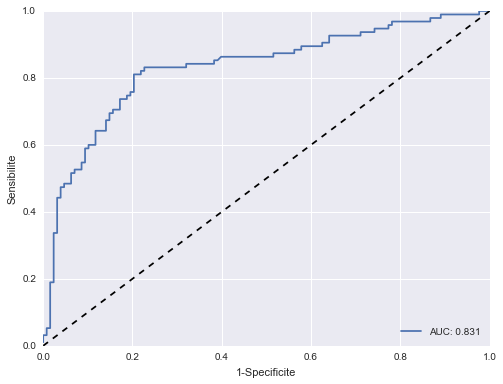

In [188]:
courbe_roc(y_test, y_pred_prob)

In [190]:
def plot_importance(feature_importance, columns, nb=10):
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    # sort the index
    sorted_idx = np.argsort(feature_importance)
    # plot only the first 25 features
    pos = np.arange(nb) + .5
    plt.figure(figsize=(12,6))
    plt.barh(pos, feature_importance[sorted_idx][-nb:], align='center')
    plt.yticks(pos, columns[sorted_idx][-nb:])

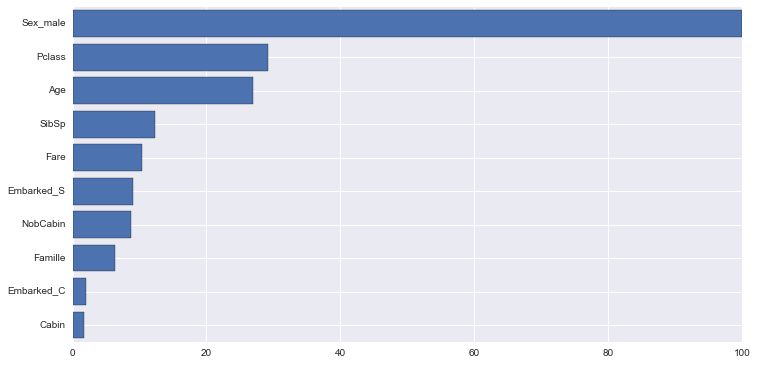

In [191]:
plot_importance(arbre.feature_importances_, X_test.columns)

In [192]:
arbre.feature_importances_

array([ 0.13988983,  0.12947062,  0.05899874,  0.        ,  0.04979575,
        0.00834441,  0.48033214,  0.00972806,  0.        ,  0.04363198,
        0.03059945,  0.00743783,  0.0417712 ])

In [193]:
titanic.shape

(891, 14)

In [194]:
X.shape

(891, 13)

## Forêt aléatoire

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
clf = RandomForestClassifier(n_estimators = 500, max_depth = 3, n_jobs = -1, max_features=3)

In [197]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [198]:
y_pred = clf.predict(X_test)

In [199]:
pred_proba = clf.predict_proba(X_test)[:,1]

aire sous la courbe :  0.831208881579


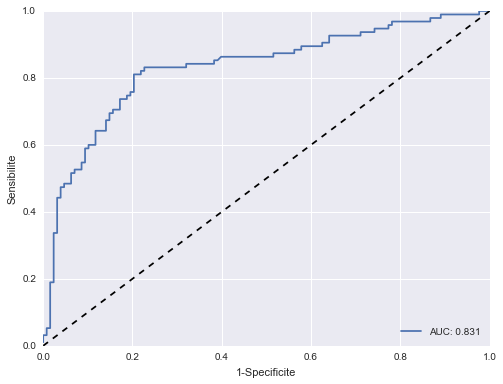

In [200]:
courbe_roc(y_test, y_pred_prob)

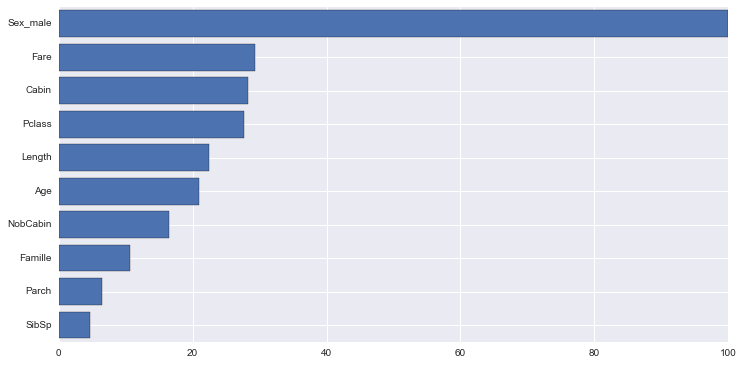

In [201]:
plot_importance(clf.feature_importances_, X_test.columns)

In [202]:
from sklearn.ensemble import GradientBoostingClassifier

In [203]:
clf = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1)

In [204]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [205]:
y_pred = clf.predict(X_test)

In [206]:
pred_proba = clf.predict_proba(X_test)[:,1]

aire sous la courbe :  0.831208881579


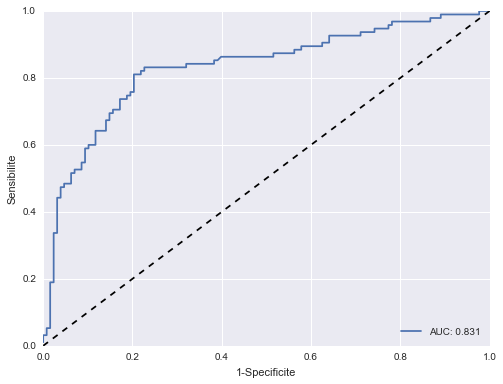

In [207]:
courbe_roc(y_test, y_pred_prob)

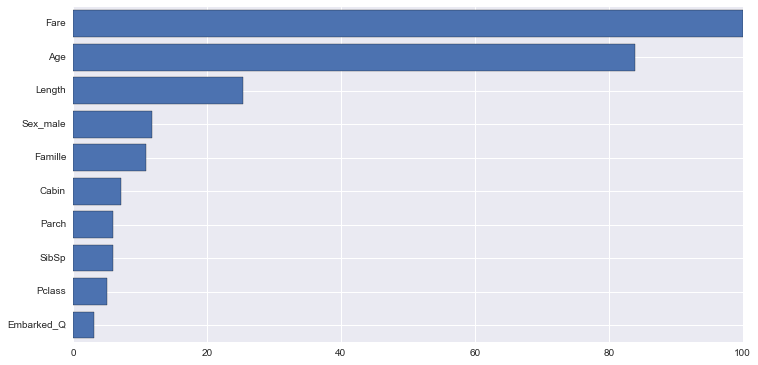

In [209]:
plot_importance(clf.feature_importances_, X_test.columns)

In [208]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble.gradient_boosting:

class GradientBoostingClassifier(BaseGradientBoosting, sklearn.base.ClassifierMixin)
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is induced.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'deviance', 'exponential'}, optional (default='deviance')
 |      loss function to be optimized. 'deviance' refers to
 |      deviance (= logistic regression) for classification
 |      with probabilistic outputs. For loss 'exponential' gradient
 |      boosting recovers the AdaBoost a